# Quantifying Shakespeare

In this notebook we will find the frequencies with which Shakespeare's words used letters.

In [32]:
from io import TextIOWrapper

def read_file(filename: str) -> list[str]: 
    """Given the name of a file, return a list of its lines."""
    lines: list[str] = []
    file: TextIOWrapper = open(filename, "r", encoding="utf8")
    for line in file: 
        line = line.strip()
        line = line.lower()
        if line != "": 
            lines.append(line)
    return lines

shakespeare_lines: list[str] = read_file("./shakespeare.txt")
print(len(shakespeare_lines))

114638


The next step of our analysis is to count the letters in the lines list one by one to find the frequency of use of each letter.

In [33]:
# Goal: Define a function named `tally`
# Give the function (as params) a dictionary reference (key: str, value: int) and a key 
# If the key is in the dictionary, increase the value by 1
# Otherwise, the key's value is 1
# It is a procedure and returns None


def tally(counts: dict[str, int], key: str) -> None: 
    """Mutate char_count to increment a key by 1 if it exists, or initialize to 1."""
    if key in counts: 
        counts[key] += 1
    else: 
        counts[key] = 1

def count_letters(lines: list[str]) -> dict[str, int]: 
    """Count frequencies of all letter sin a lits of strings."""
    counts: dict[str, int] = {}
    for line in lines: 
        for key in line: 
            if key >= 'a' and key <= "z":  # or if char.isalpha()
                tally(counts, key)
    #   Challenge: tally only letters! No numbers or punct
    return counts


shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)

{'t': 328987, 'h': 236584, 'e': 446147, 's': 248518, 'o': 313890, 'n': 242751, 'b': 61788, 'y': 94173, 'w': 89286, 'i': 253329, 'l': 169657, 'a': 288594, 'm': 111219, 'k': 35362, 'p': 58249, 'r': 237250, 'f': 80333, 'c': 87839, 'u': 128697, 'd': 149127, 'g': 68054, 'v': 37497, 'z': 1626, 'x': 5217, 'q': 3577, 'j': 4752}


Let's create a visualization of this data with a bar chart.

In [34]:
items_in_dict: list[tuple[str, int]] = list(shakespeare_letters.items())
# tuple is pairing of key and value "item"
items_in_dict = sorted(items_in_dict)  # sort in a-z order
sorted_letters: dict[str, int] = dict(items_in_dict)
print(sorted_letters)

{'a': 288594, 'b': 61788, 'c': 87839, 'd': 149127, 'e': 446147, 'f': 80333, 'g': 68054, 'h': 236584, 'i': 253329, 'j': 4752, 'k': 35362, 'l': 169657, 'm': 111219, 'n': 242751, 'o': 313890, 'p': 58249, 'q': 3577, 'r': 237250, 's': 248518, 't': 328987, 'u': 128697, 'v': 37497, 'w': 89286, 'x': 5217, 'y': 94173, 'z': 1626}


<BarContainer object of 26 artists>

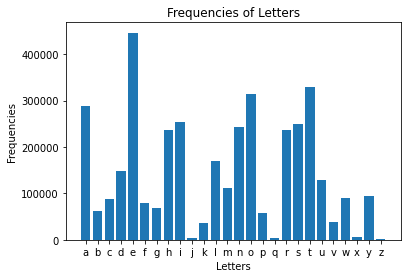

In [35]:
from matplotlib import pyplot

pyplot.title("Frequencies of Letters")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequencies")
labels: list[str] = list(sorted_letters.keys())
values: list[int] = list(sorted_letters.values())
pyplot.bar(labels, values)